# NEST Simulator tutorial:  Populations

In this tutorial we start working with populations of different sizes. In firs place we will see how to simulate them and inspect them. Latter we will see the connection rules employed when working on crowded networks. Finally, we will work on a complex computational model.

First, we initialize and creat a integrate and fire model. However, in this tutorial we work with big potpulations, so in the same global ID variable (here named "population") we indicate NEST to create 1000 cells.

In [1]:
import nest
import numpy as np
import matplotlib.pyplot as plt

# Setting up the NEST simulator
nest.ResetKernel()

# Set spike recorder
spike_detector = nest.Create("spike_recorder")

# Creating a population of 1000 neurons
num_neurons = 1000
neuron_params = {"I_e": 100.0, "tau_m": 20.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -70.0}
population = nest.Create("iaf_psc_alpha", num_neurons, params=neuron_params)

# Connecting the population to the spike_detector
nest.Connect(population, spike_detector)


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: HEAD@41892a50f
 Built: Mar  8 2023 07:54:18

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



The name of the variable save the global IDs of each neuron. Also, for each neuron we can have different parameters and status values, and we can access them. On the one hand, if we call for the "population.PARAMETER" we obtain all the 1000 values. On the other hand, if we know the exact global Node Collection ID we can obtain the all the properties using "nest.GetStatus(NodeCollectionID)"

In [2]:
population.V_m

(-70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,
 -70.0,


In [3]:
neuron_200 = population[200] # Neuron number 200 out of 1000 neurons population.
nest.GetStatus(neuron_200)

({'archiver_length': 0,
  'beta_Ca': 0.001,
  'C_m': 250.0,
  'Ca': 0.0,
  'E_L': -70.0,
  'element_type': 'neuron',
  'frozen': False,
  'global_id': 202,
  'I_e': 100.0,
  'local': True,
  'model': 'iaf_psc_alpha',
  'model_id': 17,
  'node_uses_wfr': False,
  'post_trace': 0.0,
  'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'),
  'synaptic_elements': {},
  't_ref': 2.0,
  't_spike': -1.0,
  'tau_Ca': 10000.0,
  'tau_m': 20.0,
  'tau_minus': 20.0,
  'tau_minus_triplet': 110.0,
  'tau_syn_ex': 2.0,
  'tau_syn_in': 2.0,
  'thread': 0,
  'thread_local_id': -1,
  'V_m': -70.0,
  'V_min': -inf,
  'V_reset': -70.0,
  'V_th': -55.0,
  'vp': 0},)

## Exercise #1

Sometimes, when we want to initiliaze the network in a biological state with neurons at different states, we modulate the membrane potential state (V_m). Use a numpy random number generator (np.random.rand(#)) to set the membrane potential of each neuron with a initial value randomly ranging from -70 mV to -55 mV. Later, inspect the V_m value for all neurons.

(-67.92654151331259,
 -60.37507099319136,
 -63.45447949759842,
 -56.15936295625326,
 -63.709974931372585,
 -56.87470507982878,
 -55.69784139232017,
 -62.458484170587006,
 -65.73613238466086,
 -66.45351051782143,
 -59.61480717552878,
 -64.72317593976801,
 -66.34559501501833,
 -62.07153612861454,
 -67.1262449336908,
 -68.25828158359553,
 -69.12583330818931,
 -63.74837205172724,
 -65.18721712500043,
 -68.97317372181743,
 -66.30503202109091,
 -58.18761016857239,
 -58.35761899614013,
 -69.14799340936514,
 -57.48636223915418,
 -56.23846175299026,
 -69.28334934852995,
 -65.7612539637899,
 -69.00692893451912,
 -69.47599702934355,
 -69.0983807038341,
 -60.89080763832355,
 -63.87214797678822,
 -66.80265276124759,
 -55.54511816291433,
 -57.82970943240419,
 -61.147735745418416,
 -59.703200084909895,
 -65.84526970649289,
 -59.38187350268082,
 -67.68748595410526,
 -67.7264989791825,
 -61.5742262843612,
 -59.37714244091527,
 -66.55582694642615,
 -66.6938380366447,
 -62.62436179928169,
 -55.4523030619

Finally, to complete the script and once the network has been randomly initialize, we add poisonnian noise and simulate 1 second.

In [5]:
# Generating Poissonian noise
rate = 10.0  # average firing rate in Hz
poisson_generator = nest.Create("poisson_generator", params={"rate": rate})

# Connecting the noise generator to the population
nest.Connect(poisson_generator, population, syn_spec={"weight": 250.0, "delay": 1.0})

# Simulating the network
simulation_time = 1000.0
nest.Simulate(simulation_time)


Jul 16 11:41:16 NodeManager::prepare_nodes [Info]: 
    Preparing 1002 nodes for simulation.

Jul 16 11:41:16 MUSICManager::enter_runtime [Info]: 
    Entering MUSIC runtime with tick = 1 ms

Jul 16 11:41:16 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1002
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 16 11:41:16 SimulationManager::run [Info]: 
    Simulation finished.


In our previous tutorials we saw how una or two neurons fire. However, here we will see the firing response of 1000 neurons. In each row we display each one of the neurons and time in the columns direction.

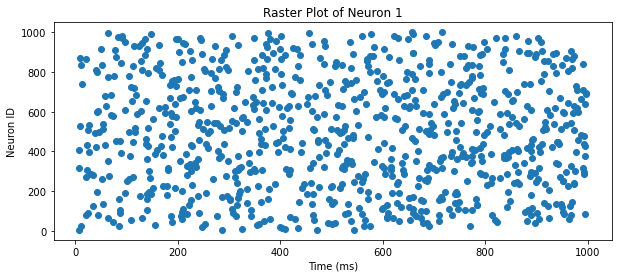

In [6]:
# Plotting the raster plot of the population
spike_events = nest.GetStatus(spike_detector, "events")[0]
plt.figure(figsize=(10, 4))
plt.scatter(spike_events["times"], spike_events["senders"])
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.title("Raster Plot of Neuron 1")
plt.show()

## Exercise #2

How would have been the previous graph if the network is not randomly initialized? Copy and re-run all the script without randomly varying the V_m status prior to the simulation.


Jul 16 11:41:17 NodeManager::prepare_nodes [Info]: 
    Preparing 1002 nodes for simulation.

Jul 16 11:41:17 MUSICManager::enter_runtime [Info]: 
    Entering MUSIC runtime with tick = 1 ms

Jul 16 11:41:17 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1002
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 16 11:41:17 SimulationManager::run [Info]: 
    Simulation finished.


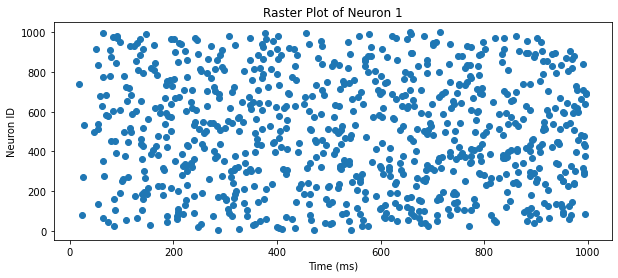

In [7]:
import nest
import numpy as np
import matplotlib.pyplot as plt

# Setting up the NEST simulator
nest.ResetKernel()

# Set spike recorder
spike_detector = nest.Create("spike_recorder")

# Creating a population of 1000 neurons
num_neurons = 1000
neuron_params = {"I_e": 100.0, "tau_m": 20.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -70.0}
population = nest.Create("iaf_psc_alpha", num_neurons, params=neuron_params)

# Connecting the population to the spike_detector
nest.Connect(population, spike_detector)

# Generating Poissonian noise
rate = 10.0  # average firing rate in Hz
poisson_generator = nest.Create("poisson_generator", params={"rate": rate})

# Connecting the noise generator to the population
nest.Connect(poisson_generator, population, syn_spec={"weight": 250.0, "delay": 1.0})

# Simulating the network
simulation_time = 1000.0
nest.Simulate(simulation_time)

# Plotting the raster plot of the population
spike_events = nest.GetStatus(spike_detector, "events")[0]
plt.figure(figsize=(10, 4))
plt.scatter(spike_events["times"], spike_events["senders"])
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.title("Raster Plot of Neuron 1")
plt.show()

When we work with huge amounts of neurons in one population, we still can access to the parameters and current status of each one of the neurons. Interestingly, NEST works using global IDs for each neuron. This identificator number allow us to work with precision and inspect properties of each neuron.

This number can be found in the NodeGlobal ID and not always match the number of the neuron in the population. For example devices such as spike recorders also counts as 1 node ID. That is important to keep in mind. Also, remember that IDs in NEST starts in 1, but in python index count start at 0. For example, the 790th neuron of the population, has to be called as 789 and its nest ID is reflected at "first".

In [8]:
population[789]

NodeCollection(metadata=None, model=iaf_psc_alpha, size=1, first=791)

## Exercise #3

Exercise, look the parameters of the neuron number #344 of the population.In some neuropathologies sometimes a neuron can behave in a anomalous way. Localize the neuron #344 and change its background input current to I_e = 300 pA. In this case we simulate the increase of activity of this neuron. This modulation allow us to check whether this slight modification can trigger changes in the network behaviour.
Afther the modification, simulate 3 seconds more and plot the spiking response.


Jul 16 11:41:17 NodeManager::prepare_nodes [Info]: 
    Preparing 1002 nodes for simulation.

Jul 16 11:41:17 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1002
    Simulation time (ms): 3000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 16 11:41:18 SimulationManager::run [Info]: 
    Simulation finished.


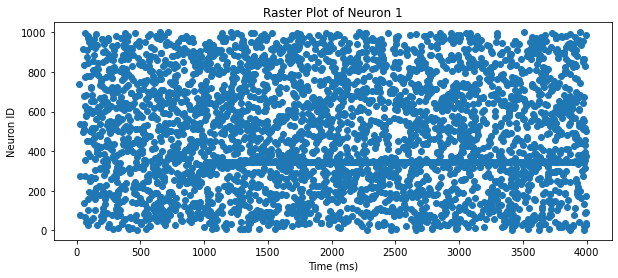

#### Connecting neurons

The next step is the connection of the neurons between them in the network. In nature, neurons are always widely connecting between them, and this connection makes them to fire together creating an oscillatory neural response.
<br><br>Ovbiously, connecting each neuron one by one would be an disgusting and boring task. Fortunately, we can indicate the network to connect it following several rules. Thus, we can connect population with itself, for instance, indicating the nuber of inputs to each neuron (Method #1): Here we indicate that each neuron receives connections from a 10% of the population with a weight of 10.0 pA and a delay of 1.0 ms.


Jul 16 11:41:19 NodeManager::prepare_nodes [Info]: 
    Preparing 1002 nodes for simulation.

Jul 16 11:41:19 MUSICManager::enter_runtime [Info]: 
    Entering MUSIC runtime with tick = 1 ms

Jul 16 11:41:19 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1002
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 16 11:41:19 SimulationManager::run [Info]: 
    Simulation finished.


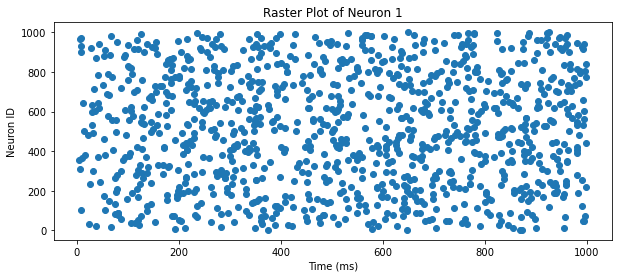

In [10]:
import nest
import numpy as np
import matplotlib.pyplot as plt

# Setting up the NEST simulator
nest.ResetKernel()

# Set spike recorder
spike_detector = nest.Create("spike_recorder")

# Creating a population of 1000 neurons
num_neurons = 1000
neuron_params = {"I_e": 100.0, "tau_m": 20.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -70.0}
population = nest.Create("iaf_psc_alpha", num_neurons, params=neuron_params)

# Connecting the population to the spike_detector
nest.Connect(population, spike_detector)

# Randomly initialize membrane potential voltage for each neuron
population.V_m = ((np.random.rand(1000)*15)-70)

# Generating Poissonian noise
rate = 10.0  # average firing rate in Hz
poisson_generator = nest.Create("poisson_generator", params={"rate": rate})

# Connecting the noise generator to the population
nest.Connect(poisson_generator, population, syn_spec={"weight": 250.0, "delay": 1.0})


# Method 1: Randomly connect each neuron to 10% of the population
conn_params_1 = {"rule": "fixed_indegree", "indegree": int(num_neurons * 0.1)}
nest.Connect(population, population, conn_params_1, syn_spec={"weight": 10.0, "delay": 1.0})


# Simulating the network
simulation_time = 1000.0
nest.Simulate(simulation_time)

# Plotting the raster plot of the population
spike_events = nest.GetStatus(spike_detector, "events")[0]
plt.figure(figsize=(10, 4))
plt.scatter(spike_events["times"], spike_events["senders"])
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.title("Raster Plot of Neuron 1")
plt.show()

In the next example, we randomly connect each neuron to 10 other neurons and again with a weight of 10.0 pA and 1.0 ms of delay.


Jul 16 11:41:20 NodeManager::prepare_nodes [Info]: 
    Preparing 1002 nodes for simulation.

Jul 16 11:41:20 MUSICManager::enter_runtime [Info]: 
    Entering MUSIC runtime with tick = 1 ms

Jul 16 11:41:20 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1002
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 16 11:41:20 SimulationManager::run [Info]: 
    Simulation finished.


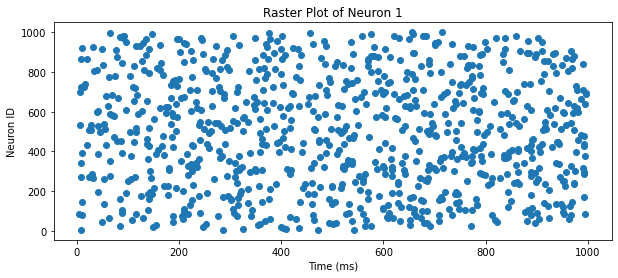

In [11]:
import nest
import numpy as np
import matplotlib.pyplot as plt

# Setting up the NEST simulator
nest.ResetKernel()

# Set spike recorder
spike_detector = nest.Create("spike_recorder")

# Creating a population of 1000 neurons
num_neurons = 1000
neuron_params = {"I_e": 100.0, "tau_m": 20.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -70.0}
population = nest.Create("iaf_psc_alpha", num_neurons, params=neuron_params)

# Connecting the population to the spike_detector
nest.Connect(population, spike_detector)

# Randomly initialize membrane potential voltage for each neuron
population.V_m = ((np.random.rand(1000)*15)-70)

# Generating Poissonian noise
rate = 10.0  # average firing rate in Hz
poisson_generator = nest.Create("poisson_generator", params={"rate": rate})

# Connecting the noise generator to the population
nest.Connect(poisson_generator, population, syn_spec={"weight": 250.0, "delay": 1.0})


# Method 2: Randomly connect each neuron to 10 other neurons
conn_params_2 = {"rule": "fixed_outdegree", "outdegree": 10}
nest.Connect(population, population, conn_params_2, syn_spec={"weight": 10.0, "delay": 1.0})


# Simulating the network
simulation_time = 1000.0
nest.Simulate(simulation_time)

# Plotting the raster plot of the population
spike_events = nest.GetStatus(spike_detector, "events")[0]
plt.figure(figsize=(10, 4))
plt.scatter(spike_events["times"], spike_events["senders"])
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.title("Raster Plot of Neuron 1")
plt.show()

Sometimes we want to specifically indicate the total number of connections, so in the following example we randomly connect each neuron to 20% of the population with a weight of 10.0 pA and 1.0 ms of delay.


Jul 16 11:41:21 NodeManager::prepare_nodes [Info]: 
    Preparing 1002 nodes for simulation.

Jul 16 11:41:21 MUSICManager::enter_runtime [Info]: 
    Entering MUSIC runtime with tick = 1 ms

Jul 16 11:41:21 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1002
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 16 11:41:21 SimulationManager::run [Info]: 
    Simulation finished.


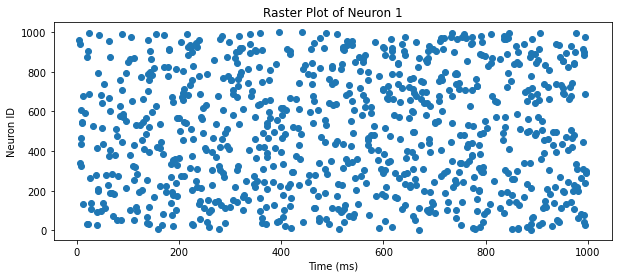

In [12]:
import nest
import numpy as np
import matplotlib.pyplot as plt

# Setting up the NEST simulator
nest.ResetKernel()

# Set spike recorder
spike_detector = nest.Create("spike_recorder")

# Creating a population of 1000 neurons
num_neurons = 1000
neuron_params = {"I_e": 100.0, "tau_m": 20.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -70.0}
population = nest.Create("iaf_psc_alpha", num_neurons, params=neuron_params)

# Connecting the population to the spike_detector
nest.Connect(population, spike_detector)

# Randomly initialize membrane potential voltage for each neuron
population.V_m = ((np.random.rand(1000)*15)-70)

# Generating Poissonian noise
rate = 10.0  # average firing rate in Hz
poisson_generator = nest.Create("poisson_generator", params={"rate": rate})

# Connecting the noise generator to the population
nest.Connect(poisson_generator, population, syn_spec={"weight": 250.0, "delay": 1.0})


# Method 3: Randomly connect each neuron to 20% of the population with a weight of 10.0
conn_params_3 = {"rule": "fixed_total_number", "N": int(num_neurons * 0.2)}
nest.Connect(population, population, conn_params_3, syn_spec={"weight": 10.0, "delay": 1.0})


# Simulating the network
simulation_time = 1000.0
nest.Simulate(simulation_time)

# Plotting the raster plot of the population
spike_events = nest.GetStatus(spike_detector, "events")[0]
plt.figure(figsize=(10, 4))
plt.scatter(spike_events["times"], spike_events["senders"])
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.title("Raster Plot of Neuron 1")
plt.show()

To summarise, we have several methods to connect the neurons, each one preferred for a different configuration. The main methods are:
- all_to_all
- fixed_indegree
- fixed_outdegree
- fixed_total_number
- one_to_one

## Exercise #4

Now, create a network of 800 neurons called "population_exc" with parameters = {"I_e": 100.0, "tau_m": 20.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -70.0}. Connect this population within itself connecting 10 synapses to each neuron with a weight of 250.0 pA and a delay of 2.0 ms. Also, create a network of 200 neurons called "population_inh" with parameters = {"I_e": 150.0, "tau_m": 20.0, "t_ref": 1.0, "V_reset": -70.0, "V_m": -70.0}. Connect this population within itself connecting 10 synapses to each neuron with a weight of -10.0 pA and a delay of 1.0 ms. Then, connect the excitatory population with the inhibitory one with a total number of 1000 connections (weight: 25.pA), and the inhibitory population to the excitatory one with 2000 connections (weight: -10.pA). Both populations are fed with a poissonian noise generator with rate 10 and connected with a weight of 25.0 pA and delay of 1.0 ms.
<br>Finally, plot the spiking activity of both populations using black for the excitatory population and gray for the inhibitory one.


Jul 16 11:41:21 NodeManager::prepare_nodes [Info]: 
    Preparing 1003 nodes for simulation.

Jul 16 11:41:21 MUSICManager::enter_runtime [Info]: 
    Entering MUSIC runtime with tick = 1 ms

Jul 16 11:41:21 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1003
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 16 11:41:22 SimulationManager::run [Info]: 
    Simulation finished.


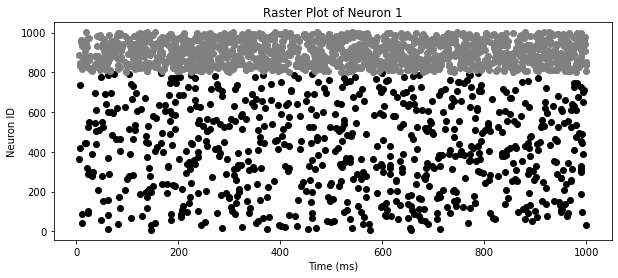

## Exercise #4

In order to create a cortical network showing an oscillatory response, we can tune the model by increasing constant background current coming to each excitatory neuron (I_e: 175.0 pA in Excitatory population), but reducing the weight of the random poissonian noise (connection weight: 50.0).


Jul 16 11:41:22 NodeManager::prepare_nodes [Info]: 
    Preparing 1003 nodes for simulation.

Jul 16 11:41:22 MUSICManager::enter_runtime [Info]: 
    Entering MUSIC runtime with tick = 1 ms

Jul 16 11:41:22 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1003
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 16 11:41:22 SimulationManager::run [Info]: 
    Simulation finished.


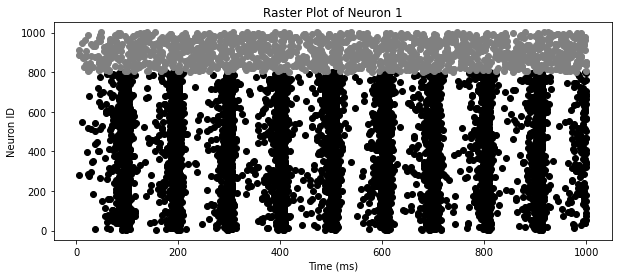

#### Measuring postsynaptic activity from the population

One of the final steps is meassure the electrophysiological response of the network. From a cognitive perspective, we are particularly interested in the postsynaptic activity of the pyramidal neurons (excitatory population). This activity is generated when synapses change produce changes in the membrane potential, thus generating extracelular current flows. Such electric flows can reach the scalp and be meassured using an electroencefalography (EEG) system, or the magnetic field associated with those flows recorded using an magnetoencefalography (MEG) system. In NEST, the postsynaptic current can be monitored and saved using the multimeter to record the "I_syn_ex" state.


Jul 16 11:41:23 NodeManager::prepare_nodes [Info]: 
    Preparing 1004 nodes for simulation.

Jul 16 11:41:23 MUSICManager::enter_runtime [Info]: 
    Entering MUSIC runtime with tick = 1 ms

Jul 16 11:41:23 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1004
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 16 11:41:23 SimulationManager::run [Info]: 
    Simulation finished.


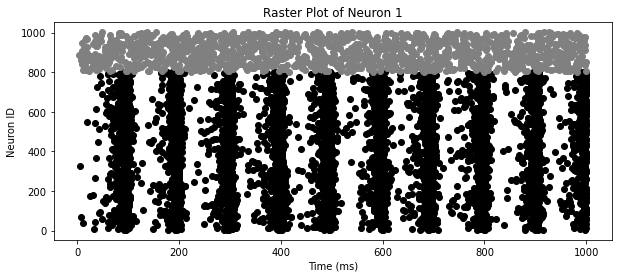

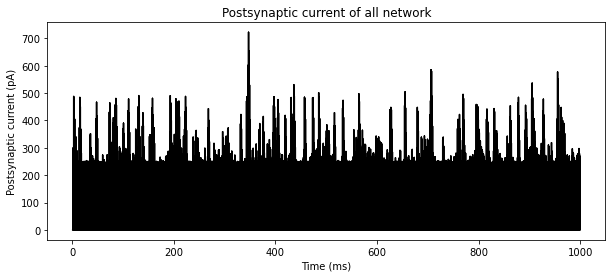

In [15]:
import nest
import numpy as np
import matplotlib.pyplot as plt

# Setting up the NEST simulator
nest.ResetKernel()

# Set spike recorders
spike_detector_exc = nest.Create("spike_recorder")
spike_detector_inh = nest.Create("spike_recorder")

# Creating populations
neuron_params = {"I_e": 175.0, "tau_m": 20.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -70.0}
population_exc = nest.Create("iaf_psc_alpha", 800, params=neuron_params)
neuron_params2 = {"I_e": 150.0, "tau_m": 20.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -70.0}
population_inh = nest.Create("iaf_psc_alpha", 200, params=neuron_params2)

# Connecting the population to the spike_detector
nest.Connect(population_exc, spike_detector_exc)
nest.Connect(population_inh, spike_detector_inh)

# Randomly initialize membrane potential voltage for each neuron
population_exc.V_m = ((np.random.rand(800)*15)-70)
population_inh.V_m = ((np.random.rand(200)*15)-70)

# Generating Poissonian noise
rate = 10.0  # average firing rate in Hz
poisson_generator = nest.Create("poisson_generator", params={"rate": rate})

# Connecting the noise generator to the population
nest.Connect(poisson_generator, population_exc, syn_spec={"weight": 50.0, "delay": 1.0})
nest.Connect(poisson_generator, population_inh, syn_spec={"weight": 250.0, "delay": 1.0})

# Connections
conn_10_indegree = {"rule": "fixed_indegree", "indegree": 10}
nest.Connect(population_exc, population_exc, conn_10_indegree, syn_spec={"weight": 25.0, "delay": 2.0})
nest.Connect(population_inh, population_inh, conn_10_indegree, syn_spec={"weight": -10.0, "delay": 1.0})

nest.Connect(population_exc, population_inh, conn_spec={"rule":"fixed_total_number", "N":1000}, syn_spec={"weight": 25.0, "delay": 1.0})
nest.Connect(population_exc, population_inh, conn_spec={"rule":"fixed_total_number", "N":2000}, syn_spec={"weight": -10.0, "delay": 1.0})

# Create an multimeter to collect the postsynaptic current incoming to the excitatory population
multimeter = nest.Create("multimeter", params={"record_from": ["I_syn_ex"]})
nest.Connect(multimeter, population_exc)
nest.Connect(multimeter, population_inh)

# Simulating the network
simulation_time = 1000.0  # 1 second
nest.Simulate(simulation_time)

# Plotting the raster plot of the population
spike_events_exc = nest.GetStatus(spike_detector_exc, "events")[0]
spike_events_inh = nest.GetStatus(spike_detector_inh, "events")[0]
plt.figure(figsize=(10, 4))
spike_events["times"]

plt.scatter(spike_events_exc["times"], spike_events_exc["senders"], c='black')
plt.scatter(spike_events_inh["times"], spike_events_inh["senders"], c='gray')
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.title("Raster Plot of Neuron 1")
plt.show()

# Plotting the postsynaptic current
postsynaptic_current = nest.GetStatus(multimeter, "events")[0]
plt.figure(figsize=(10, 4))
plt.plot(postsynaptic_current["times"], postsynaptic_current["I_syn_ex"], c='black')
plt.xlabel("Time (ms)")
plt.ylabel("Postsynaptic current (pA)")
plt.title("Postsynaptic current of all network")
plt.show()

The signal is collected with a sample rate of 1000 Hz, so the maximum frequency found in the signal is 500 Hz. This signal does not allow us to easily inspect or analyse our data, so traditionally we band-pass filter our data to a common frequency window such as f.e. 1 Hz to 60 Hz.
<br>To this end, we use the Scipy library tool to make the signtal filter:

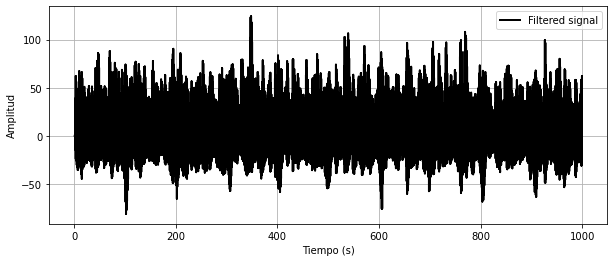

In [16]:
from scipy import signal

# Set sample rate and frequency band
sample_rate = 1000  # sample rate Hz
lowcut = 1  # below frequency Hz
highcut = 60  # upper frequency Hz

# Apply filter to data
nyquist_freq = 0.5 * sample_rate
low = lowcut / nyquist_freq
high = highcut / nyquist_freq
b, a = signal.butter(4, [low, high], btype='band')
filtered_data = signal.lfilter(b, a, postsynaptic_current["I_syn_ex"])

# Plot the activity from the excitatory pyramidal population
plt.figure(figsize=(10, 4))
plt.plot(postsynaptic_current["times"], filtered_data, 'k-', linewidth=2, label='Filtered signal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


Finally, we are interested in inpsecting the power spectrum. To this end we use again the scipy library to use the Fast Fourier Transform (FFT):

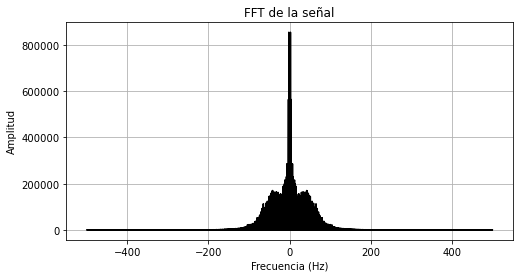

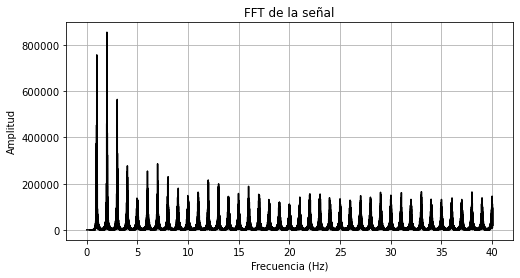

57254.14743428452

In [17]:
from scipy.fft import fft

# Calcular la FFT
fft_result = fft(filtered_data)
#fft_result = fft(postsynaptic_current["I_syn_ex"])

# Calcular los valores de frecuencia correspondientes
fs = 1000 # frequency of sampling
freq = np.fft.fftfreq(len(filtered_data), d=1/fs)

# Graficar la amplitud en función de la frecuencia
plt.figure(figsize=(8, 4))
plt.plot(freq, np.abs(fft_result), c='black')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('FFT de la señal')
plt.grid(True)
plt.show()

# Graficar la amplitud en función de la frecuencia
plt.figure(figsize=(8, 4))
indx = 40000
plt.plot(freq[:indx], np.abs(fft_result)[:indx], c='black')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('FFT de la señal')
plt.grid(True)
plt.show()

# Display power spectrum associated to 
np.abs(fft_result)[10000]


## Exercise #5

Now, change the constant input current (I_e = 300 pA) of the neuron number #344 of the excitatory population simulating a neuropathological disruption (overexcitation) sometimes a neuron can behave in a anomalous way. Calcualte the 10 Hz power spectrum response of the network and check if there are changes between the pathological and control conditions.

In [21]:
# Script of the pathological network

In [22]:
# Script of the pathological network


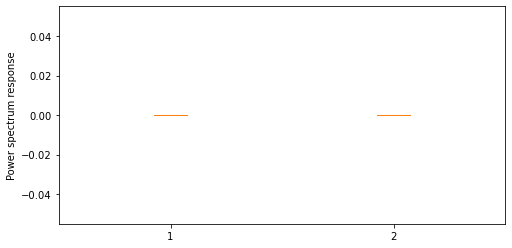

Pathological network shows an average 10 Hz response of  0.0  with a standard deviation of  0.0 . On the other hand, a control non-altered network shows an average of  0.0  and standard deviation of  0.0 .


In [24]:
# Re-running 5 times each script we collect the following data:
pathological = (0, 0, 0, 0, 0)
control = (0, 0, 0, 0, 0)
plt.figure(figsize=(8, 4))
plt.boxplot([pathological, control])
plt.ylabel('Power spectrum response')
plt.show()
print("Pathological network shows an average 10 Hz response of ", round(np.mean(pathological),2), " with a standard deviation of ", round(np.std(pathological),2), ". On the other hand, a control non-altered network shows an average of ", round(np.mean(control),2), " and standard deviation of ", round(np.std(control),2), ".")

## Final exercise

Finally, create 3 cortical nodes with 800 excitatory (pyramidal) neurons and 200 inhibotory cells per cortical node with the same parameters as used before. Obtain the postsynaptic activity for each cortical node and explore its behaviour creating and changing the long range connections between the cortical nodes in order to obtain different configurations and results.